# study the sensitivity of $\theta_p$ vs. $\theta_\mu$ to $m_A$

In [1]:
import sys; sys.path.insert(0, '../../'); sys.path.insert(0, '../mupClassification/');  sys.path.insert(0, '../off_beam_on_beam_5e19/'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from axial_mass_tools import *
import seaborn as sns;sns.set(style="white", color_codes=True ,font_scale=2);
%matplotlib inline

OffBeam_scaling: 1.24224698773 = N(on beam)/N(off beam) before sof. trig.
MC_scaling_DATAcosmic: 0.504451038576 = N(POT on beam)/N(POT MC)
MC_scaling_MCcosmic: 0.136225100235 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/AxialMassPlayground//'

In [3]:
GENIEall = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/genie/prodgenie_bnb_nu_uboone_overlay_mcc8_reco2_genie.csv')
print len(GENIEall),'CC interactions pairs in GENIE'
GENIE_CC1p0pi = GENIEall[GENIEall['IsCC_1p_200MeVc_0pi']==1]
GENIE_CC1p0pi_reconstructed = GENIE_CC1p0pi[GENIE_CC1p0pi['IsVertexReconstructed']==1]

73444 CC interactions pairs in GENIE


In [4]:
MCbnbDATAcosmicPairsFV, MCbnbDATAcosmicSamples = load_MCbnbDATAcosmicSamples()
cuts_pureff = apply_cuts_MCbnbDATAcosmic(PIDa_p_min=12,                                                                             
                         delta_Delta_phi=40,                         
                         r_max_RdQ_CC1p0pi=0.33)
pureff_MCbnbDATAcosmic,pureff_MCbnbDATAcosmic_numbers = cuts_pureff
pureff_MCbnbDATAcosmic

50939 pairs from MC-BNB + cosmic DATA overlay
30377 pairs in FV
3814 are 1mu-1p, 12.6%
4001 are other pairs, 13.2%
22562 are cosmic, 74.3%
--------------------------------------------------------------
1234 are CC 1p 0pi, 4.1%


,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,12.6%,100.0%,4.1%,no cut,100.0% (3814),100.0% (4001),100.0% (22562),100.0% (1234)
non-collinearity first,90.4%,45.3%,94.8%,15.4%,"$|\theta_{1,2}-90^0|<60^0$",90.4% (3446),42.7% (1707),10.9% (2462),94.8% (1170)
PIDa,79.9%,45.6%,76.1%,14.0%,${PID}_a>12$,79.9% (3046),38.4% (1536),9.3% (2102),76.1% (939)
length,64.0%,59.4%,63.9%,19.2%,$l_{\mu}>l_{p}$,64.0% (2440),20.3% (812),3.8% (855),63.9% (789)
non-collinearity,58.5%,70.8%,61.4%,24.0%,"$|\theta_{1,2}-90^0|<60^0$",58.5% (2231),14.2% (570),1.6% (351),61.4% (758)
vertex activity,34.2%,78.3%,53.2%,39.4%,"$\sqrt{\sum_{p=0,1,2}(R_{\Delta Q}^{p}-1)^2}<0...",34.2% (1306),5.9% (235),0.6% (127),53.2% (657)
delta phi,24.1%,87.7%,47.9%,56.3%,$|\Delta \phi - \pi|<40^0$,24.1% (921),2.1% (85),0.2% (44),47.9% (591)
theta_pq,17.5%,95.4%,39.4%,69.4%,$\theta_{pq}<25^0$,17.5% (668),0.8% (32),0.0% (0),39.4% (486)
Pt no Delta phi,24.7%,88.7%,46.1%,53.6%,$p_{t}<0.35$ GeV/c,24.7% (941),2.5% (99),0.1% (21),46.1% (569)
soft Pt,20.2%,94.6%,42.9%,65.1%,$p_{t}<0.35$ GeV/c,20.2% (769),1.1% (43),0.0% (1),42.9% (529)


# $\theta_p$ vs. $\theta_\mu$

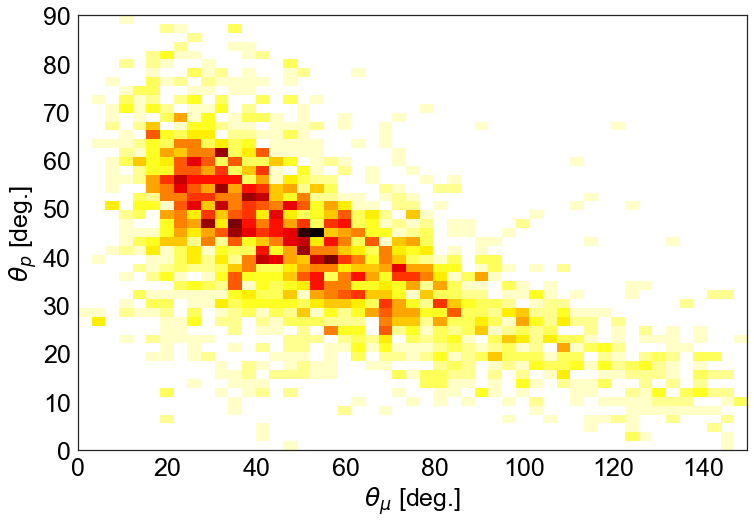

In [5]:
theta_mu = 180./np.pi*GENIE_CC1p0pi_reconstructed['truth_Pmu_theta']
theta_p = 180./np.pi*GENIE_CC1p0pi_reconstructed['truth_Pp_theta']
fig,ax=plt.subplots(figsize=(12,8))
plot_2d_hist( theta_mu , theta_p , bins=(np.linspace(0,150,50),np.linspace(0,90,50)),ax=ax);
set_axes(ax,r'$\theta_\mu$ [deg.]',r'$\theta_p$ [deg.]')

## weight each event by the elastic Cross-section for a given axial mass

In [22]:
for mA in [0.7,1.0,1.3]:
    print 'calculating weight w(Xsec, mA=%.2f GeV)'%mA
    GENIE_CC1p0pi_reconstructed['w(Xsec, mA=%f)'%mA] = CCelasticXsec( Q2=GENIE_CC1p0pi_reconstructed['truth_Q2']
                                                                     , Ev=GENIE_CC1p0pi_reconstructed['truth_Ev']
                                                                     , mA=mA )

calculating weight w(Xsec, mA=0.70 GeV)
calculating weight w(Xsec, mA=1.00 GeV)
calculating weight w(Xsec, mA=1.30 GeV)


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


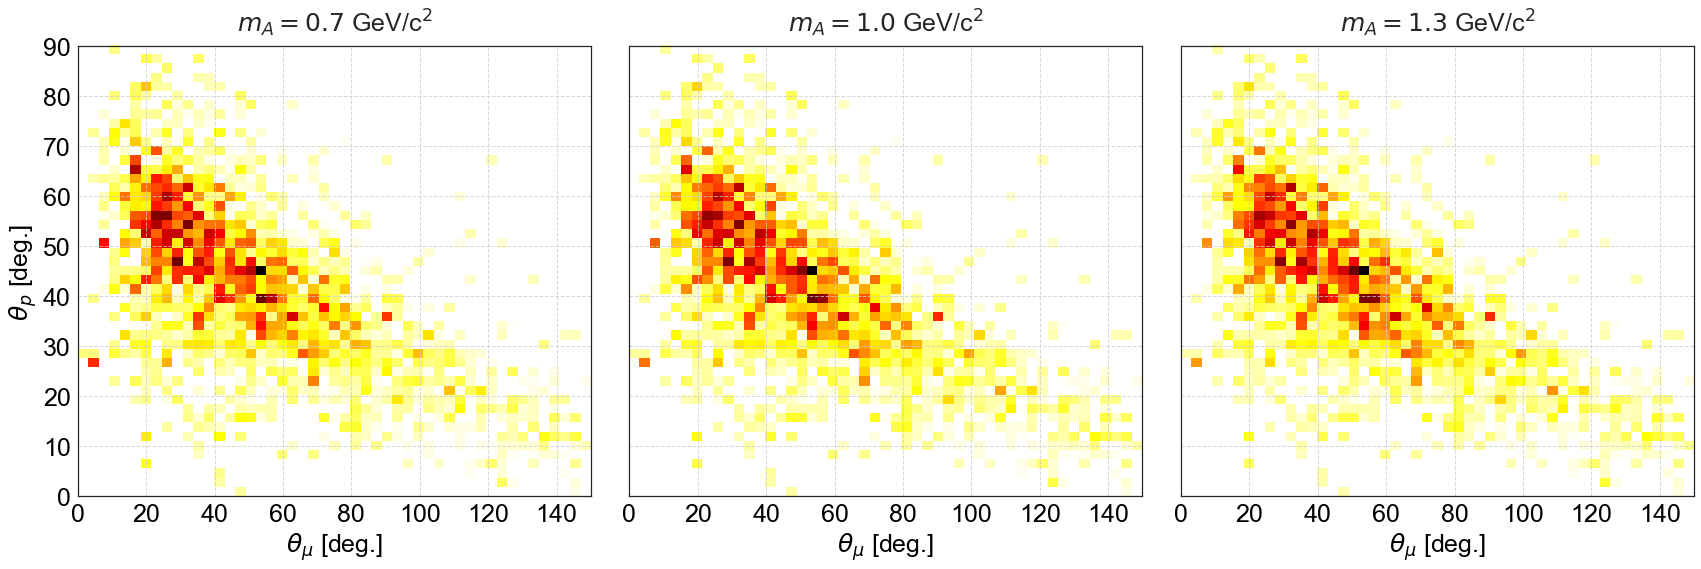

In [25]:
fig=plt.figure(figsize=(24,8))
for i_mA,mA in enumerate([0.7,1.0,1.3]):
    ax = fig.add_subplot(1,3,i_mA+1)
    weights = GENIE_CC1p0pi_reconstructed['w(Xsec, mA=%f)'%mA]
    plot_2d_hist( theta_mu , theta_p , weights=weights , bins=(np.linspace(0,150,50),np.linspace(0,90,50)),ax=ax);
    set_axes(ax,r'$\theta_\mu$ [deg.]',r'$\theta_p$ [deg.]' if i_mA==0 else ''
             ,title=r'$m_A = %.1f$ GeV/c$^2$'%mA,do_add_grid=True)
    if i_mA>0: ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()    

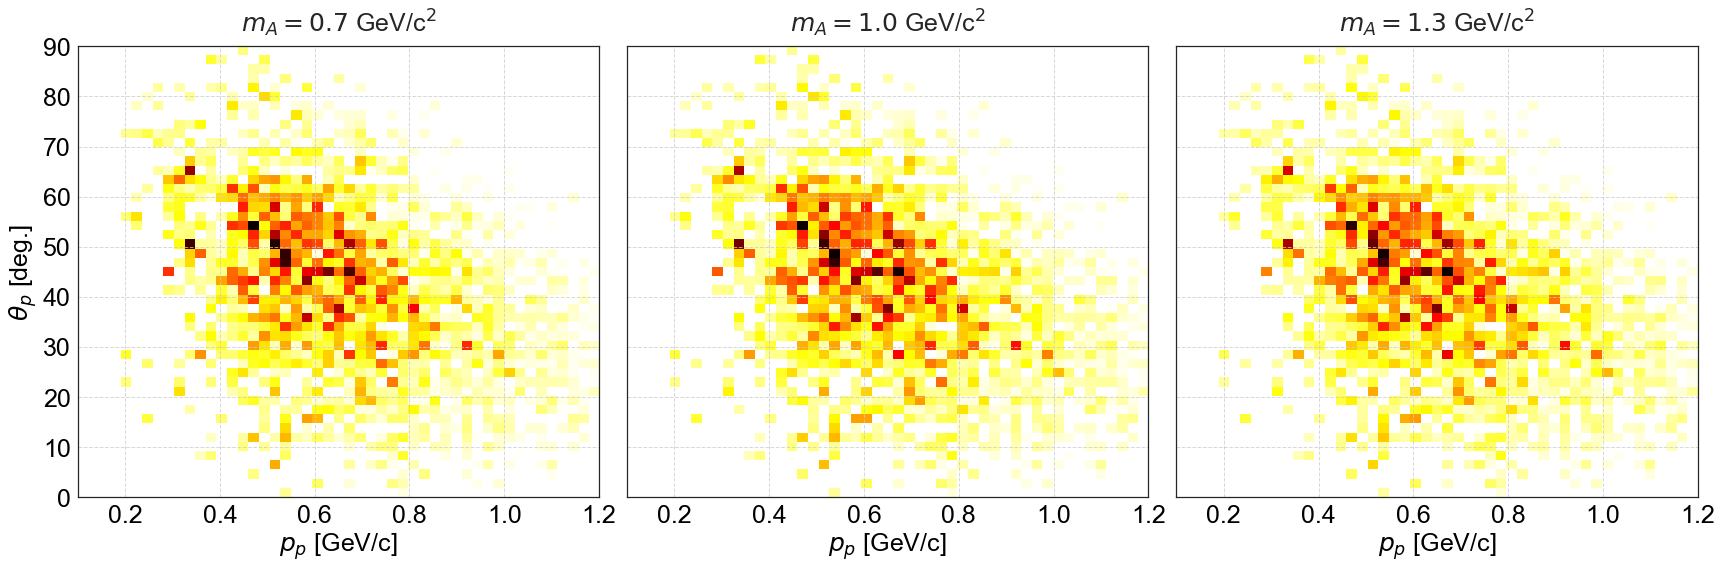

In [29]:
fig=plt.figure(figsize=(24,8))
for i_mA,mA in enumerate([0.7,1.0,1.3]):
    ax = fig.add_subplot(1,3,i_mA+1)
    P_p = GENIE_CC1p0pi_reconstructed['truth_Pp']
    theta_p = 180./np.pi*GENIE_CC1p0pi_reconstructed['truth_Pp_theta']
    weights = GENIE_CC1p0pi_reconstructed['w(Xsec, mA=%f)'%mA]
    plot_2d_hist( P_p , theta_p , weights=weights , bins=(np.linspace(0.1,1.2,50),np.linspace(0,90,50)),ax=ax);
    set_axes(ax,r'$p_p$ [GeV/c]',r'$\theta_p$ [deg.]' if i_mA==0 else ''
             ,title=r'$m_A = %.1f$ GeV/c$^2$'%mA,do_add_grid=True)
    if i_mA>0: ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()    

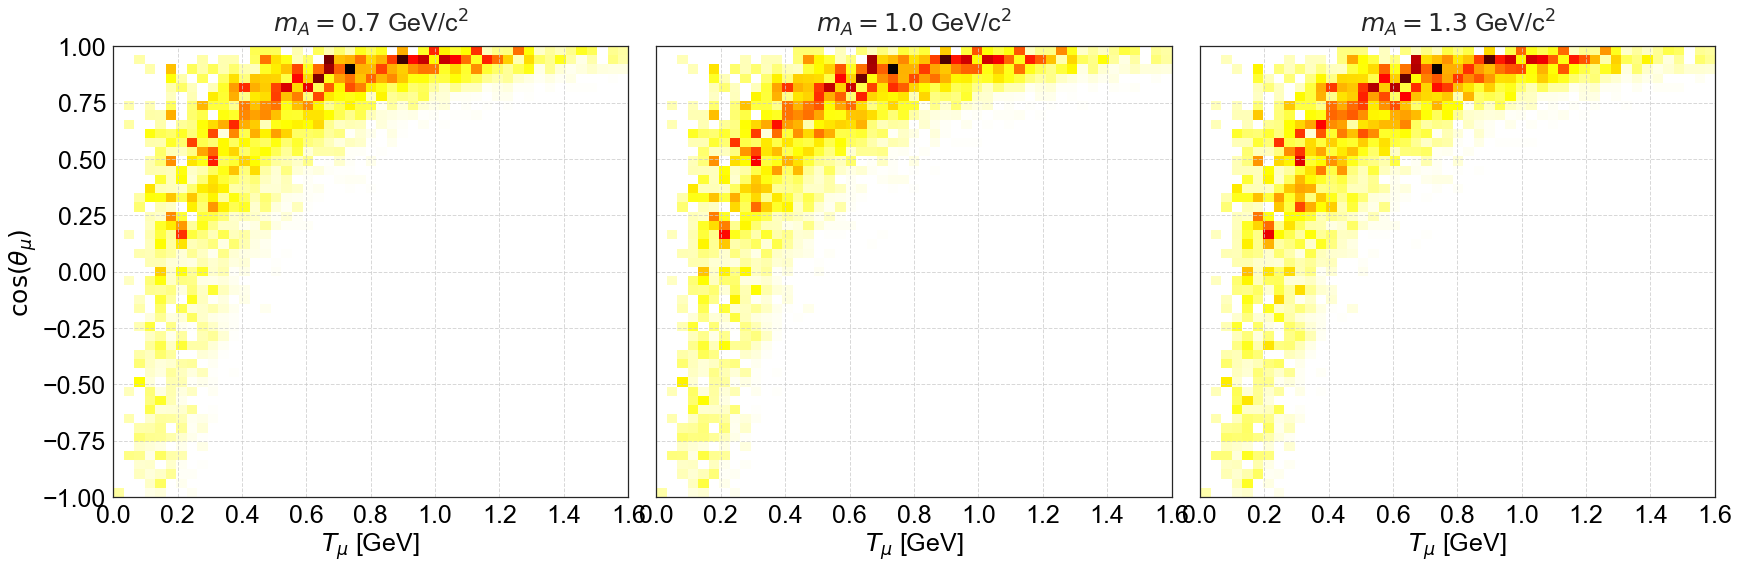

In [35]:
fig=plt.figure(figsize=(24,8))
for i_mA,mA in enumerate([0.7,1.0,1.3]):
    ax = fig.add_subplot(1,3,i_mA+1)
#     P_mu = GENIE_CC1p0pi_reconstructed['truth_Pmu']
    T_mu = np.sqrt(np.square(GENIE_CC1p0pi_reconstructed['truth_Pmu'])+np.square(0.1056)) - 0.1056

    cos_theta_mu = np.cos(GENIE_CC1p0pi_reconstructed['truth_Pmu_theta'])
    weights = GENIE_CC1p0pi_reconstructed['w(Xsec, mA=%f)'%mA]
    plot_2d_hist( T_mu , cos_theta_mu , weights=weights , bins=(np.linspace(0.,1.6,50),np.linspace(-1,1,50)),ax=ax);
    set_axes(ax,r'$T_\mu$ [GeV]',r'$\cos(\theta_\mu)$' if i_mA==0 else ''
             ,title=r'$m_A = %.1f$ GeV/c$^2$'%mA,do_add_grid=True)
    if i_mA>0: ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()    